In [ ]:
import pandas as pd
df = pd.read_csv("insurance.csv")

In [ ]:
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows of dataset:")
df.head()

Shape of dataset: (1338, 7)

First 5 rows of dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Basic Data Cleaning

In [ ]:
# Check duplicates
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicate Rows: 1


2. Handle Outliers

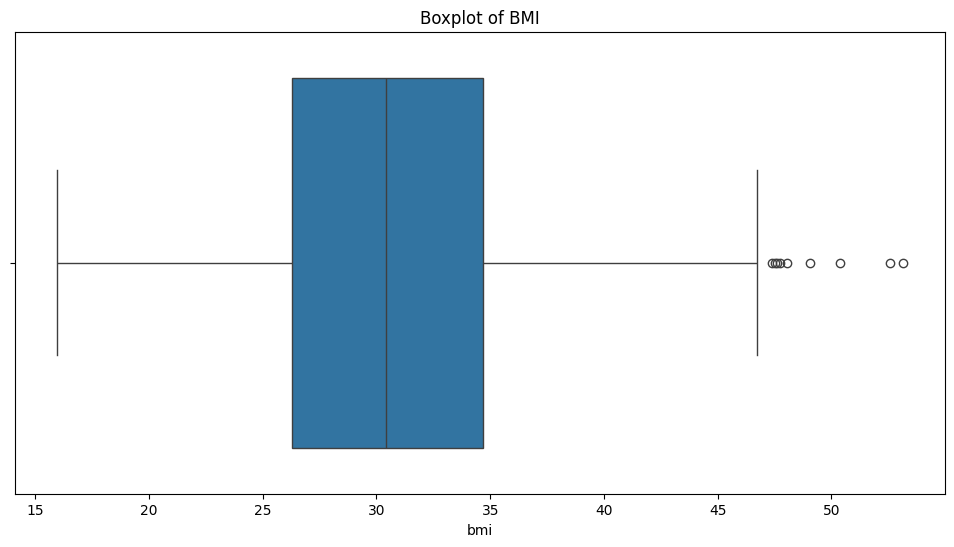

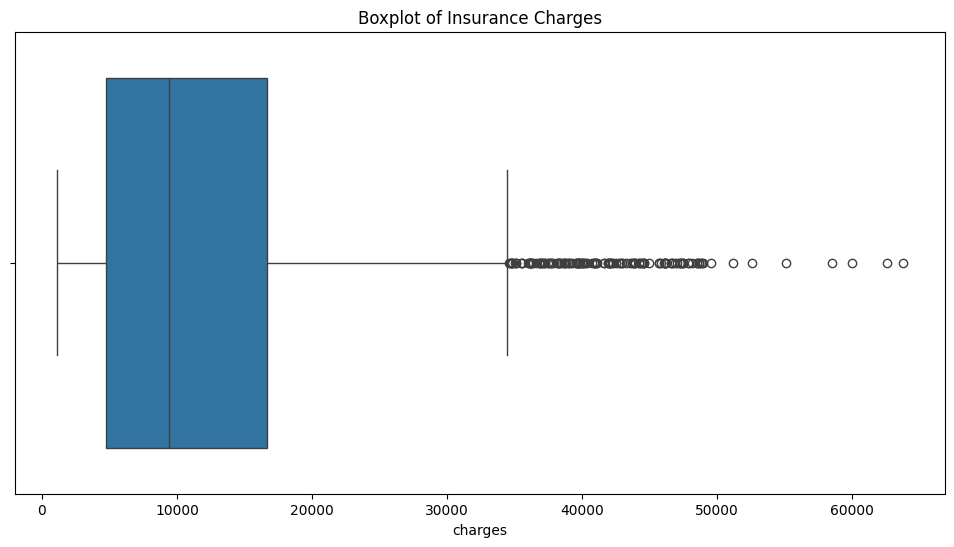

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers
plt.figure(figsize=(12,6))
sns.boxplot(x=df['bmi'])
plt.title("Boxplot of BMI")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=df['charges'])
plt.title("Boxplot of Insurance Charges")
plt.show()

removing extreme outliers

In [ ]:
q_low = df['charges'].quantile(0.01)
q_high = df['charges'].quantile(0.99)
df = df[(df['charges'] >= q_low) & (df['charges'] <= q_high)]

Encode Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder


df_clean = df.copy()


le = LabelEncoder()
df_clean['sex'] = le.fit_transform(df_clean['sex'])
df_clean['smoker'] = le.fit_transform(df_clean['smoker'])


df_clean = pd.get_dummies(df_clean, columns=['region'], drop_first=True)


4. Feature Engineering the bmi cateogory

In [ ]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df_clean['bmi_category'] = df_clean['bmi'].apply(bmi_category)


df_clean = pd.get_dummies(df_clean, columns=['bmi_category'], drop_first=True)


df_clean['age_smoker'] = df_clean['age'] * df_clean['smoker']


In [ ]:
#final head
df_clean.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight,age_smoker
0,19,0,27.900,0,1,16884.92400,False,False,True,False,True,False,19
1,18,1,33.770,1,0,1725.55230,False,True,False,True,False,False,0
2,28,1,33.000,3,0,4449.46200,False,True,False,True,False,False,0
3,33,1,22.705,0,0,21984.47061,True,False,False,False,False,False,0
4,32,1,28.880,0,0,3866.85520,True,False,False,False,True,False,0


In [ ]:
df.to_csv("cleaned_insurance.csv", index=False)